In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.widgets import SpanSelector, RectangleSelector

# Span Selector

In [2]:
class slice_fun():
    '''Slice Function Class.
    Opens up a two subfigures plot in an interactive matplotlib backend. 
    It allows to select in the top subfigure the x-datapoints of interest, plotting the output datapoints in bottom subfigure. 
    If your backend is not interactive, the Class won't work. 
    You can change backend with a line of code before calling this class:
    %matplotlib qt
    Remember to call:
    %matplotlib inline
    After using this function.
    
    ARGUMENTS:
    X: x-data array
    Y: y-data array
    
    ACCESS TO:
    class.newx: selected x-array data points
    class.newy: selected y-array data points
    '''
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y
        def onselect_x(xmin, xmax):
            # Finding index from xmin xmax values
            indmin, indmax = np.searchsorted(self.X, (xmin, xmax))
            indmax = min(len(self.X) - 1, indmax)
            # Creating selection of the array
            self.newx = self.X[indmin:indmax]
            self.newy = self.Y[indmin:indmax]
            # Plotting the new selection, probably a method of self.line, = self.ax is more effective            
            self.ax2.cla()
            self.ax2.plot(self.newx, self.newy)
            # Some customization
            self.ax2.set_xlim(self.newx[0], self.newx[-1])
            self.ax2.set_ylim(self.newy.min()-self.newy.max()*0.05, self.newy.max()+self.newy.max()*0.05)
            self.fig.canvas.draw()

        # Plotting the array without selection
        self.fig, (self.ax1, self.ax2) = plt.subplots(2, 1, figsize=(7, 7))
        self.ax1.plot(self.X, self.Y)
        self.ax2.plot(self.X, self.Y)
        # Some customization
        self.ax1.set_xlabel("Frequency / Hz")
        self.ax1.set_ylabel("Intensity")
        self.ax2.set_xlabel("Frequency / Hz")
        self.ax2.set_ylabel("Intensity")
        # Selector class, recall arguments of direction, span_stays, button and rectprops
        self.span = SpanSelector(self.ax1, onselect=onselect_x,
                            direction="horizontal", useblit=True, span_stays=True, button=1,
                            rectprops={"facecolor":"red", "alpha":0.3})
        plt.show()

In [3]:
nmr = np.loadtxt("aminoprop.csv", delimiter=",")

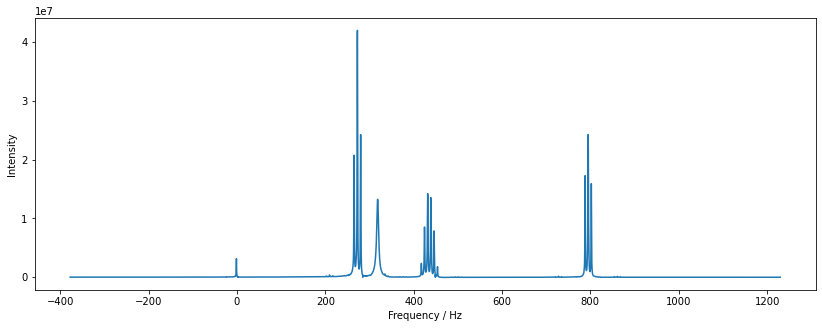

In [4]:
fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(nmr[:, 0], nmr[:, 1])
ax.set_xlabel("Frequency / Hz")
ax.set_ylabel("Intensity")
plt.show()

In [5]:
%matplotlib qt
selection = slice_fun(nmr[:, 0], nmr[:, 1])

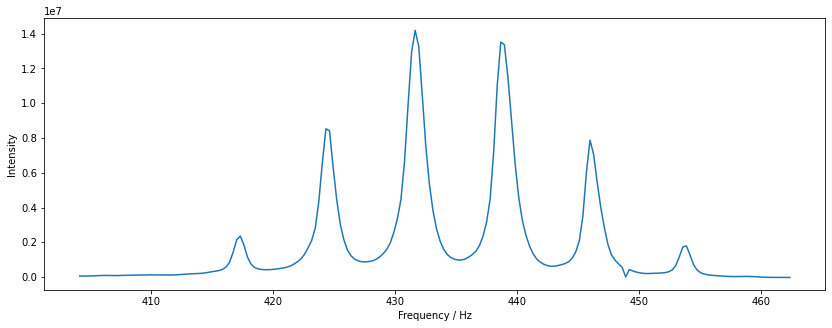

In [6]:
# Example of datapoints selected
%matplotlib inline
fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(selection.newx, selection.newy)
ax.set_xlabel("Frequency / Hz")
ax.set_ylabel("Intensity")
plt.show()

# Rectangle Selector

In [7]:
class slice_2d():
    def __init__(self, X, Y, Z):
        '''Slice Function Class.
    Opens up a two subfigures plot in an interactive matplotlib backend. 
    It allows to select in the left subfigure the (x, y, z)-datapoints of interest, plotting the output datapoints in right subfigure. 
    If your backend is not interactive, the Class won't work. 
    You can change backend with a line of code before calling this class:
    %matplotlib qt
    Remember to call:
    %matplotlib inline
    After using this function.
    
    ARGUMENTS:
    X: x-data array
    Y: y-data array
    Z: z-data array
    
    ACCESS TO:
    class.newx: selected x-array data points
    class.newy: selected y-array data points
    class.newz: selected z-array data points'''
        self.X = X
        self.Y = Y
        self.Z = Z
        
        def line_select_callback(eclick, erelease):
            # Finding new index
            x1, y1 = eclick.xdata, eclick.ydata
            x2, y2 = erelease.xdata, erelease.ydata
            yindmin, yindmax = np.searchsorted(self.Y, (y1, y2))
            yindmax = min(len(self.Y) - 1, yindmax)
            xindmin, xindmax = np.searchsorted(self.X, (x1, x2))
            xindmax = min(len(self.X) - 1, xindmax)
            # Creating new arrays
            self.newx = X[xindmin:xindmax]
            self.newy = Y[yindmin:yindmax]
            self.newz = Z[yindmin:yindmax, xindmin:xindmax]
            # Plotting new results
            self.ax2.cla()
            self.ax2.contourf(self.newx, self.newy, self.newz, cmap="gist_heat_r")
            self.ax2.set_xlabel("Excitation Frequency / $cm^{-1}$")
            self.ax2.set_ylabel("Detection Frequency / $cm^{-1}$")
            self.fig.canvas.draw()
        
        # Ploting first arrays
        self.fig, (self.ax1, self.ax2) = plt.subplots(1, 2, figsize=(14, 6))
        self.ax1.contourf(self.X, self.Y, self.Z, cmap="Greys")
        self.ax2.contourf(self.X, self.Y, self.Z, cmap="gist_heat_r")
        # Some customization
        self.ax1.set_xlabel("Excitation Frequency / $cm^{-1}$")
        self.ax1.set_ylabel("Detection Frequency / $cm^{-1}$")
        self.ax2.set_xlabel("Excitation Frequency / $cm^{-1}$")
        self.ax2.set_ylabel("Detection Frequency / $cm^{-1}$")
        self.ax1.set(xlim=(self.X.min(), self.X.max()), ylim=(self.Y.min(), self.Y.max()))
        
        # Selector class, recall arguments drawtype, button, spancoords and interactive
        self.span = RectangleSelector(self.ax1, line_select_callback,
                                       drawtype='box', useblit=True,
                                       button=[1, 3], spancoords="pixels",
                                       minspanx=0.1, minspany=0.1,
                                       interactive=True)
        
        
        plt.show()

In [8]:
multi = np.loadtxt("2dmap.txt", delimiter=" ")

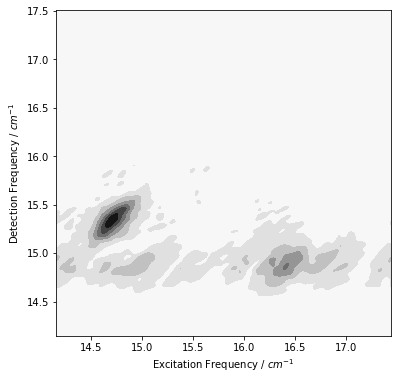

In [9]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.contourf(multi[1:, 0], multi[0, 1:], multi[1:, 1:], cmap="Greys")
ax.set_xlabel("Excitation Frequency / $cm^{-1}$")
ax.set_ylabel("Detection Frequency / $cm^{-1}$")
plt.show()

In [10]:
%matplotlib qt
selection_2d = slice_2d(multi[1:, 0], multi[0, 1:], multi[1:, 1:])

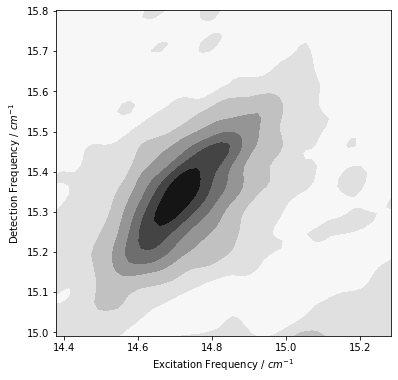

In [11]:
# Example of datapoints selected
%matplotlib inline
fig, ax = plt.subplots(figsize=(6, 6))
ax.contourf(selection_2d.newx, selection_2d.newy, selection_2d.newz, cmap="Greys")
ax.set_xlabel("Excitation Frequency / $cm^{-1}$")
ax.set_ylabel("Detection Frequency / $cm^{-1}$")
plt.show()